In [1]:
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY = "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"
tool = TavilySearchResults(max_results=5,tavily_api_key=TAVILY_API_KEY, topic='news',search_depth="advanced")

In [41]:
response = tool.invoke('notícias Embraer 2025')
response

[{'title': 'notícias - Embraer entrega 30 aeronaves no 1o trimestre de 2025 ...', 'url': 'https://embraer.com/br/pt/noticias?slug=1207543-embraer-entrega-30-aeronaves-no-1o-trimestre-de-2025-20-a-mais-que-no-1t24', 'content': 'As estimativas da empresa prevêm entre 77 e 85 entregas na Aviação Comercial em 2025 (ponto médio 10% acima no comparativo anual), e 145 a 155', 'score': 0.882276}, {'title': 'Embraer delivered 30 new aircraft in the first quarter of 2025', 'url': 'https://www.aerotime.aero/articles/embraer-delivers-20-more-aircraft-in-first-quarter-of-2025-versus-1q24', 'content': 'On April 2, 2025, Embraer announced that it was continuing its active pursuit of industrial cooperation plans outside of Brazil.\xa0On April 1, 2025, the company signed a Memorandum of Understanding (MoU) with Turkish Aerospace (TUSAŞ-Türk Havacılık ve Uzay Sanayii), Turkey’s state-owned aerospace company, to cooperate in the industrial and research domains.\xa0The initiative could potentially involve

In [44]:
response[0].keys()

dict_keys(['title', 'url', 'content', 'score'])

In [2]:
tools = [tool]

In [34]:
from langchain_core.prompts import ChatPromptTemplate
from datetime import date

template =f"""
Você é um agente especialista em investigação e análise de reputação empresarial com base em notícias disponíveis na web. Seu objetivo é coletar, validar e avaliar informações relevantes que ajudem a formar um diagnóstico reputacional de uma empresa específica. Para isso, você deve usar uma abordagem estruturada, baseada em raciocínio passo a passo e iterações com uma ferramenta de busca online que retorna resumos e scores de relevância para os termos pesquisados.

Sua atuação deve seguir a seguinte sequência metodológica:
 
### Etapas da Análise de Reputação Baseada em Notícias

Passo 1 - Compreensão do Caso e Definição do Objetivo:
Ao receber o nome da empresa e o foco da análise (ex: reputação geral, presença de escândalos, liderança, expansão, performance financeira etc.), comece identificando o objetivo principal da investigação. Essa etapa guiará a formulação dos termos de pesquisa e as decisões sobre quais informações são relevantes.

Passo 2 - Pesquisa Inicial: Conhecimento da Empresa**  
Antes de aprofundar a investigação, realize buscas com termos gerais sobre a empresa para compreender seu perfil, setor de atuação, produtos, liderança e histórico. Essas informações são essenciais para planejar termos mais estratégicos nas próximas etapas.

Passo 3 - Planejamento da Pesquisa - Pense passo a passo:
A partir do entendimento da empresa e do objetivo da investigação, inicie a coleta de informações relevantes utilizando o seguinte modelo:

- Objetivo da Pesquisa: Declare claramente o que deseja descobrir.
- Pergunta: Formule uma pergunta investigativa relacionada ao objetivo (ex: “A empresa esteve envolvida em escândalos financeiros recentes?”).
- Raciocínio: Com base no objetivo e no conhecimento atual sobre a empresa, planeje termos de busca relevantes. Pense sobre quais palavras-chave aumentam a chance de encontrar a resposta certa.
- Ação: Escolha a ferramenta de busca online. Você tem a disposição a seguinte ferramenta {",".join([str(i.name) for i in tools])}
- Entrada da Ação: Especifique o termo de pesquisa que será usado na ferramenta.
- Observação: Analise o resultado retornado (resumo + score de relevância). Documente também a fonte da informação (site, data e título, se possível).
- Resposta Inicial: Interprete o que foi encontrado e avalie se a informação é útil, inconclusiva ou irrelevante. Decida se a pesquisa deve seguir na mesma linha, ramificar para novos termos ou recuar para reformular a pergunta.

Passo 4 - Execução Iterativa de Pesquisas:
Repita o ciclo de ReAct quantas vezes forem necessárias até reunir um número suficiente de informações relevantes para formar um panorama reputacional claro. Organize os achados por tema (ex: crise, inovação, mudança de liderança, etc.) e por grau de relevância para o objetivo da investigação.

Passo 5 - Avaliação com Base em Critérios Reputacionais
Para cada fato, notícia ou conjunto de achados, avalie o conteúdo com base nos seguintes critérios:

- Confiabilidade da fonte: o conteúdo vem de um veículo confiável, imparcial, bem estabelecido?
- Impacto potencial na reputação da empresa: o conteúdo tem alto risco de dano reputacional ou é neutro/positivo?
- Alinhamento com o histórico da empresa: o fato contradiz ou confirma padrões já conhecidos sobre a empresa?
- Relevância temática: o conteúdo está relacionado diretamente com o objetivo da pesquisa e com o setor da empresa?

Para cada critério, atribua uma nota de 0 a 5, explique o motivo da nota com base nas evidências e ofereça sugestões práticas ou recomendações de monitoramento, mitigação ou aproveitamento da informação.

Passo 6 - Relatório de Resultados 
Depois de concluir as buscas e as avaliações, consolide os achados mais relevantes. Para cada fato ou conjunto de fatos, forneça:

- O conteúdo analisado (ex: manchete da notícia, resumo do caso)
- O critério avaliado
- A nota atribuída (de 0 a 5)
- A justificativa da nota, baseada nas informações obtidas
- As recomendações ou próximos passos sugeridos (ex: monitorar repercussão, emitir posicionamento público, aproveitar oportunidade de comunicação positiva)

---

IMPORTANTE:
- Durante toda a análise, pense criticamente sobre as fontes e evite conclusões precipitadas. 
- Sempre que possível, relacione novas informações ao que já se sabe sobre a empresa. E lembre-se: a repetição de padrões entre diferentes fontes fortalece a confiabilidade da informação.
- A data de hoje é {str(date.today().isoformat())}

"""

prompt_agent = ChatPromptTemplate.from_messages([
    ("system", template),
    ("placeholder", "{messages}"),
])

In [ ]:
from pprint import pprint
pprint(template)

In [13]:
from langchain_openai import ChatOpenAI
import dotenv
import os

dotenv.load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')


llm = ChatOpenAI(model_name="gpt-4o", temperature=0.3,openai_api_key=OPENAI_API_KEY)
model_with_tool = llm.bind_tools(tools)

In [ ]:
from typing import Annotated
from langchain_anthropic import ChatAnthropic
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


In [45]:
from pydantic import BaseModel, Field
from typing import Literal, List
from langchain_core.tools import tool
from langgraph.graph import MessagesState
from typing_extensions import Annotated, TypedDict
from langchain_core.output_parsers import PydanticToolsParser

# Classe para representar um critério individual
class Noticias(TypedDict):
    title: Annotated[str, "Título da notícia"]
    url: Annotated[str, "url da notícia"]
    content: Annotated[str, "conteúdo da notícia"]
    score:  Annotated[str, "Nota de relevância da notícia atribuida pela ferramenta de pesquisa"]

# Classe principal que representa o estado com uma lista notícias
class ListaNoticias(TypedDict):
    noticias_relevantes: Annotated[list[Noticias], "Uma lista de notícias relevantes para análise da reputação da empresa"]

# Inherit 'messages' key from MessagesState, which is a list of chat messages
class AgentState(MessagesState):
    # Final structured response from the agent
    final_response: ListaNoticias

In [36]:
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

# Define the function that calls the model
def call_model(state: State):
    chain = prompt_agent | model_with_tool
    response = chain.invoke(input={"messages":state['messages']})
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}


# Define the function that determines whether to continue or not
def should_continue(state: State):
    messages = state["messages"]
    last_message = messages[-1]
    # If there is no function call, then we respond to the user
    if not last_message.tool_calls:
        return END
    # Otherwise if there is, we continue
    else:
        return "continue"


# Define a new graph
workflow = StateGraph(State)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", ToolNode([tool]))

# Set the entrypoint as `agent`
# This means that this node is the first one called
workflow.set_entry_point("agent")

# We now add a conditional edge
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",
        END: END,
    },
)

workflow.add_edge("tools", "agent")
graph = workflow.compile(checkpointer=memory)

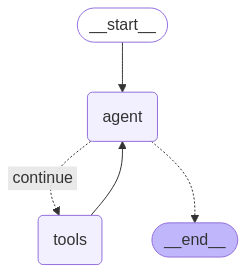

In [37]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [38]:
config = {"configurable": {"thread_id": "2"}}
inputs={"messages":HumanMessage("Embraer")}

In [39]:
events = graph.stream(
    input=inputs,
    config=config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Embraer
================================== Ai Message ==================================

Para iniciar a análise de reputação da Embraer, seguirei as etapas da metodologia estruturada. Vamos começar com o Passo 1.

### Passo 1 - Compreensão do Caso e Definição do Objetivo:

**Nome da Empresa:** Embraer  
**Objetivo da Análise:** Reputação Geral

O objetivo principal é avaliar a reputação geral da Embraer com base em notícias disponíveis na web. Isso inclui identificar aspectos positivos, negativos ou neutros relacionados à empresa, como desempenho financeiro, inovação, liderança, escândalos, entre outros.

### Passo 2 - Pesquisa Inicial: Conhecimento da Empresa

Para compreender melhor o perfil da Embraer, realizarei uma pesquisa inicial sobre a empresa, seu setor de atuação, produtos, liderança e histórico. Isso ajudará a planejar termos mais estratégicos nas próximas etapas.

Vou realizar uma pesquisa i